In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch.optim import SGD
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [12]:
x,y=torch.load('C:\\dataset\\MNIST\\processed\\training.pt')

C:\Users\dell\AppData\Local\Temp\ipykernel_3936\1321230079.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x,y=torch.load('C:\\dataset\\MNIST\\processed\\training.pt')


tensor(5)


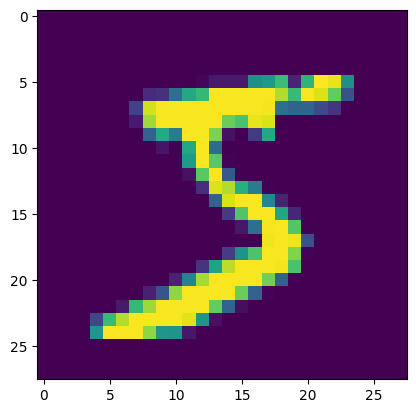

In [13]:
print(y[0])
plt.imshow(x[0])

In [16]:
class CTdata(Dataset):
    def __init__(self,filepath):
        self.x,self.y=torch.load(filepath)
        self.x=self.x/255
        self.y=F.one_hot(self.y, num_classes=10).to(float)
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self, ix):
        return self.x[ix],self.y[ix]
        


In [17]:
train_ds=CTdata('C:\\dataset\\MNIST\\processed\\training.pt')
test_ds=CTdata('C:\\dataset\\MNIST\\processed\\test.pt')

C:\Users\dell\AppData\Local\Temp\ipykernel_3936\3890389147.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.x,self.y=torch.load(filepath)


In [123]:
print(len(train_ds))
print(len(test_ds))

60000
10000


In [33]:
train_dl=DataLoader(train_ds, batch_size=5)
print(len(train_dl))
for x,y in train_dl:
    print(x.shape) 
    print(y.shape)
    break

12000
torch.Size([5, 28, 28])
torch.Size([5, 10])
tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)


**Starting with the neural network to train the data**

In [50]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.matrix1=nn.Linear(28**2,100)
        self.matrix2=nn.Linear(100,50)
        self.matrix3=nn.Linear(50,10)
        self.R=nn.ReLU()
    def forward(self,x):
        x=x.view(-1,28**2)
        x=self.R(self.matrix1(x))
        x=self.R(self.matrix2(x))
        x=self.matrix3(x)
        return x.squeeze()


In [51]:
f=MyNeuralNet()

In [52]:
f(xs)


tensor([[ 0.0064, -0.1305,  0.0446, -0.1115,  0.1304,  0.1010,  0.0531,  0.0329,
          0.1075,  0.1637],
        [ 0.0255, -0.1169,  0.0982, -0.1176,  0.1282,  0.0957,  0.0500,  0.0212,
          0.0991,  0.1548],
        [ 0.0311, -0.1370,  0.0570, -0.0936,  0.1196,  0.0668,  0.0135,  0.0144,
          0.1090,  0.1223],
        [ 0.0197, -0.1649,  0.0343, -0.1336,  0.1093,  0.0971,  0.0255,  0.0484,
          0.1217,  0.1335]], grad_fn=<SqueezeBackward0>)

In [53]:
def train_model(dl,f,n_epochs=20):
    opt=SGD(f.parameters(),lr=0.001)
    L=nn.CrossEntropyLoss()
    losses=[]
    epochs=[]
    for epoch in range(n_epochs):
        print(f'EPOCH: {epoch}')
        N=len(dl)
        for i,(x,y) in enumerate(dl):
            opt.zero_grad()
            loss_value=L(f(x),y)
            loss_value.backward()
            opt.step()
            epochs.append(epoch+i/N)
            losses.append(loss_value.item())
    return np.array(epochs),np.array(losses)




    

In [54]:
epoch_data,loss_data=train_model(train_dl,f)

EPOCH: 0
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9
EPOCH: 10
EPOCH: 11
EPOCH: 12
EPOCH: 13
EPOCH: 14
EPOCH: 15
EPOCH: 16
EPOCH: 17
EPOCH: 18
EPOCH: 19


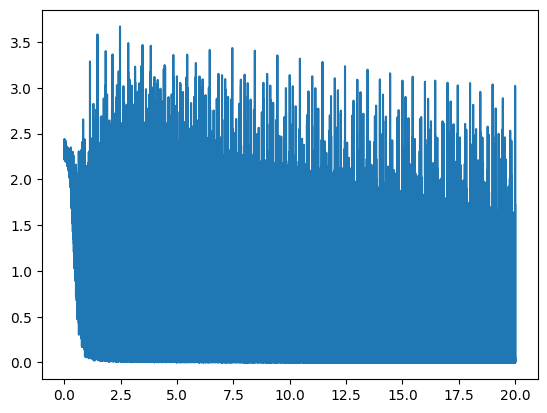

In [55]:
plt.plot(epoch_data,loss_data)

In [64]:
loss_data_avg=loss_data.reshape(20,-1).mean(axis=1)
epoch_data_avg=epoch_data.reshape(20,-1).mean(axis=1)
print(loss_data_avg)
print(epoch_data_avg)

[1.49572239 0.47937153 0.36044881 0.31353352 0.28253549 0.25880698
 0.23939469 0.22253723 0.20752018 0.19427423 0.18247138 0.17191477
 0.16241847 0.15381162 0.1460191  0.13887844 0.1323401  0.12632224
 0.12075441 0.11556632]
[ 0.49995833  1.49995833  2.49995833  3.49995833  4.49995833  5.49995833
  6.49995833  7.49995833  8.49995833  9.49995833 10.49995833 11.49995833
 12.49995833 13.49995833 14.49995833 15.49995833 16.49995833 17.49995833
 18.49995833 19.49995833]


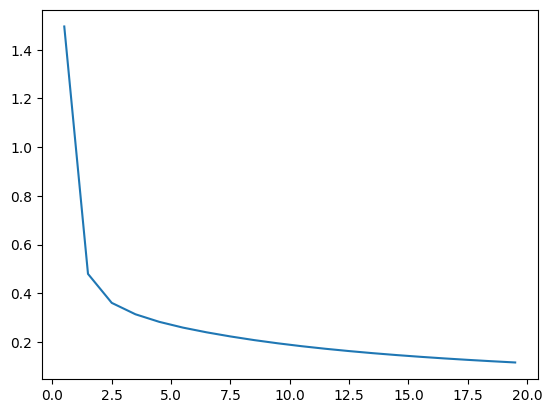

In [65]:
plt.plot(epoch_data_avg,loss_data_avg)

In [71]:
x_sample=train_ds[3][0]
y_hat=f(x_sample)
print(y_hat)
print(torch.argmax(y_hat))
print(train_ds[3][1])

tensor([-6.6349,  8.6584,  0.9516,  0.6702, -2.0119, -0.8380, -2.5784,  1.6476,
         2.0008, -2.4262], grad_fn=<SqueezeBackward0>)
tensor(1)
tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64)


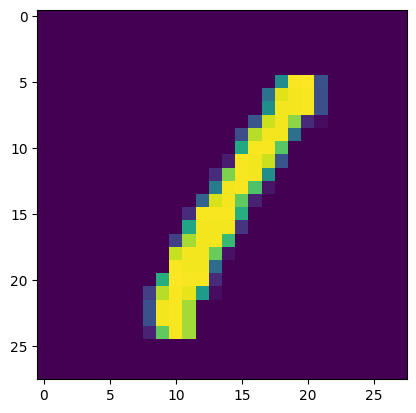

In [72]:
plt.imshow(x_sample)

In [116]:
xs,ys=train_ds[0:2000]
actual_y=ys.argmax(axis=1)
print(actual_y)


tensor([5, 0, 4,  ..., 5, 2, 0])


In [117]:
predict_y=f(xs).argmax(axis=1)

In [118]:
comparision=actual_y==predict_y
print(comparision)


tensor([True, True, True,  ..., True, True, True])


In [119]:
true_count=comparision.sum()
print(true_count)

tensor(1926)


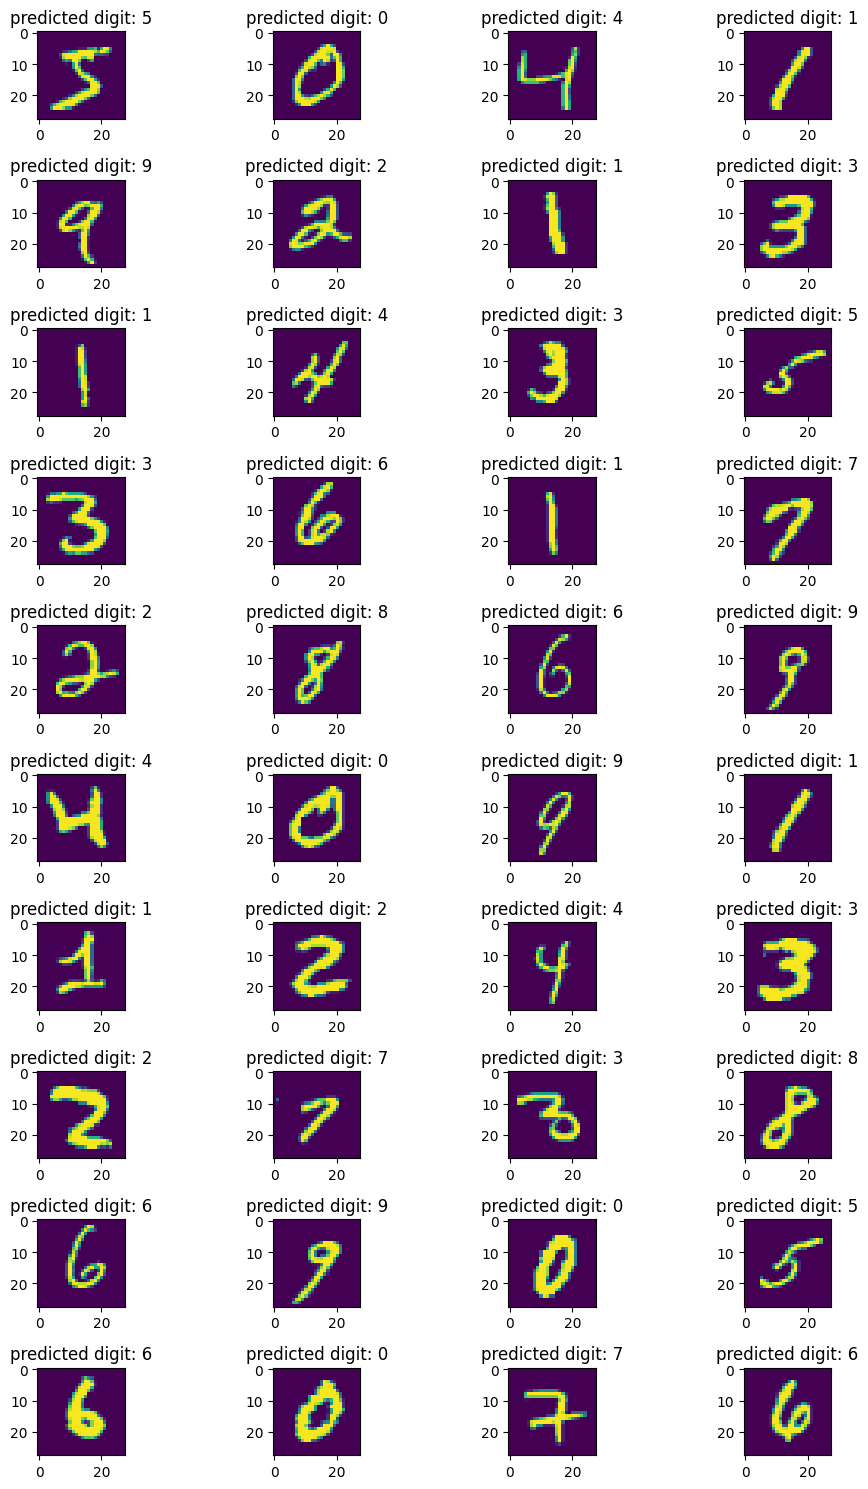

In [121]:
fig, ax=plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xs[i])
    plt.title(f'predicted digit: {predict_y[i]}')
fig.tight_layout()
plt.show()

In [103]:
xst,yst=test_ds[0:2000]

In [107]:
predict_ytest=f(xst).argmax(axis=1)
actual_ytest=yst.argmax(axis=1)

In [109]:
test_comp=actual_ytest==predict_ytest
true_countT=test_comp.sum()
print(true_countT)

tensor(1901)


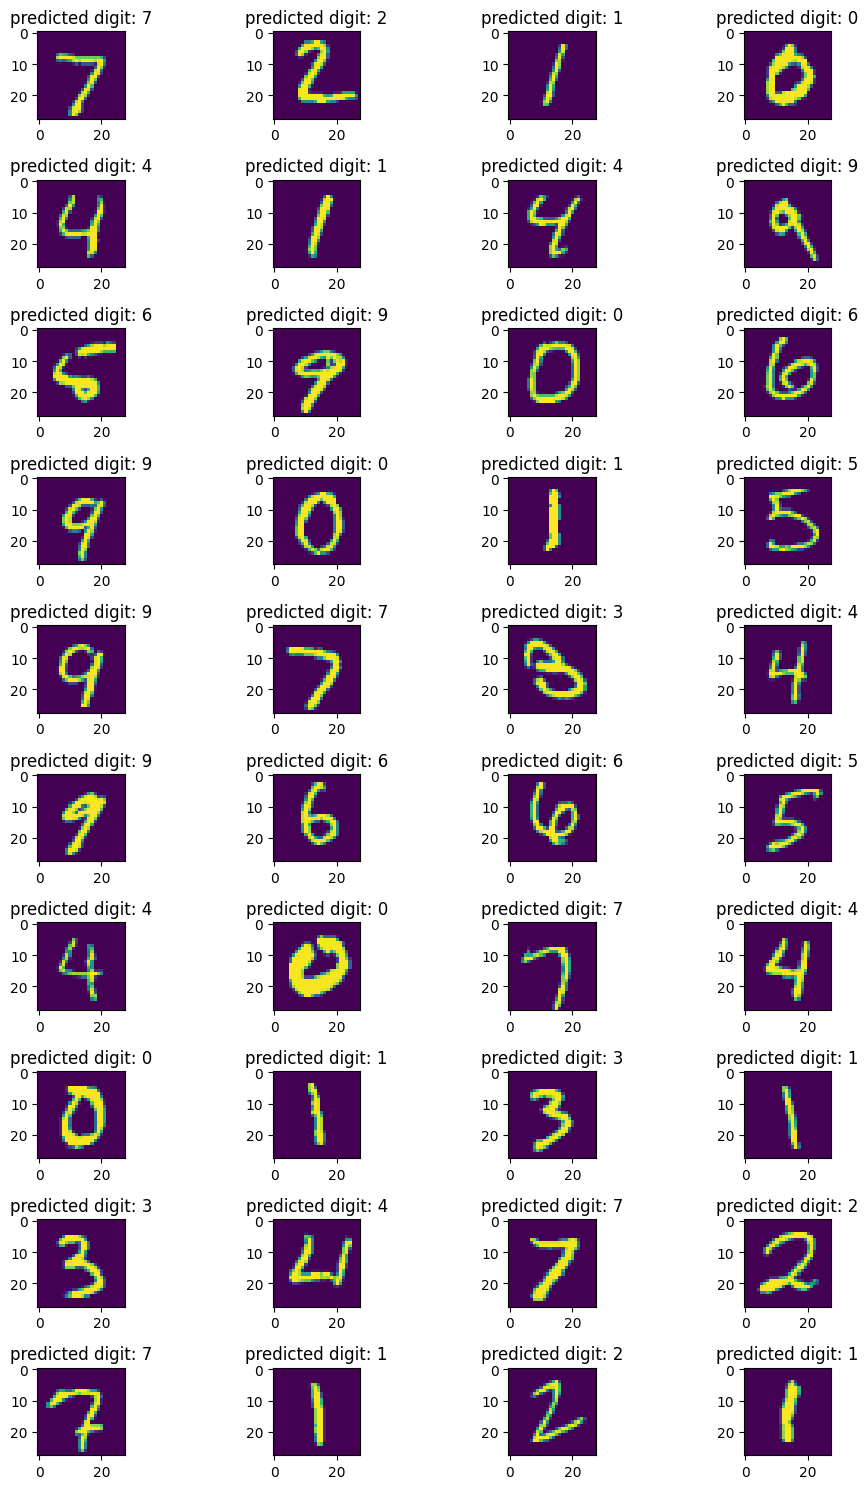

In [122]:
fig, ax=plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xst[i])
    plt.title(f'predicted digit: {predict_ytest[i]}')
fig.tight_layout()
plt.show()